In [1]:
# Importamos las librerías.

# Tratamiento de datos.
import pandas as pd
import numpy as np

# Tratamiento de nulos.
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer 

# Visualización.
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables y la distribución de las variables (estadística).
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Configuración.
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Leemos e importamos los CSVs para empezar a trabajar con ellos en dataframe.
df_world_happines = pd.read_csv('World_happiness_report_2024.csv', encoding='latin1')

In [3]:
# A continuación, comprobamos cómo ha quedado la unión de los dos dataframes. Con el '.head()' puedo ver las 5 primeras filas.
# Para mirar nuestro dataframe también podemos utilizar '.tail()' que muestra las últimas 5 filas o '.sample()', que muestra una fila al azar.
df_world_happines.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [4]:
df_world_happines['Country name'].nunique()

165

In [5]:
df_world_happines.shape

(2363, 11)

In [6]:
df_world_happines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [7]:
df_world_happines.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [8]:
df_world_happines.rename(columns={
    'Country name': 'Country',
    'Log GDP per capita': 'GDP_per_capita',
    'Healthy life expectancy at birth': 'Life_Expectancy',
    'Life Ladder': 'Happiness_Score',
    'Freedom to make life choices' : 'Freedom'
    
}, inplace=True)

In [9]:
# Convertir los nombres de las columnas a Title Case y reemplazar espacios por _
df_world_happines.columns = df_world_happines.columns.str.title().str.replace(' ', '_')

# Verificar los nuevos nombres de las columnas
print(df_world_happines.columns)


Index(['Country', 'Year', 'Happiness_Score', 'Gdp_Per_Capita',
       'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity',
       'Perceptions_Of_Corruption', 'Positive_Affect', 'Negative_Affect'],
      dtype='object')


In [10]:
df_world_happines.describe().T 

,count,mean,std,min,25%,50%,75%,max
Year,2363.0,2014.763860,5.059436,2005.000,2011.0000,2015.0000,2019.00000,2023.000
Happiness_Score,2363.0,5.483566,1.125522,1.281,4.6470,5.4490,6.32350,8.019
Gdp_Per_Capita,2335.0,9.399671,1.152069,5.527,8.5065,9.5030,10.39250,11.676
Social_Support,2350.0,0.809369,0.121212,0.228,0.7440,0.8345,0.90400,0.987
Life_Expectancy,2300.0,63.401828,6.842644,6.720,59.1950,65.1000,68.55250,74.600
Freedom,2327.0,0.750282,0.139357,0.228,0.6610,0.7710,0.86200,0.985
Generosity,2282.0,0.000098,0.161388,-0.340,-0.1120,-0.0220,0.09375,0.700
Perceptions_Of_Corruption,2238.0,0.743971,0.184865,0.035,0.6870,0.7985,0.86775,0.983
Positive_Affect,2339.0,0.651882,0.106240,0.179,0.5720,0.6630,0.73700,0.884
Negative_Affect,2347.0,0.273151,0.087131,0.083,0.2090,0.2620,0.32600,0.705


In [11]:
df_world_happines['Year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2021, 2022, 2023, 2007, 2020, 2006, 2005])

In [12]:
df_world_happines.duplicated().sum()

0

In [13]:
df_world_happines.isnull().sum()

Country                        0
Year                           0
Happiness_Score                0
Gdp_Per_Capita                28
Social_Support                13
Life_Expectancy               63
Freedom                       36
Generosity                    81
Perceptions_Of_Corruption    125
Positive_Affect               24
Negative_Affect               16
dtype: int64

In [14]:
# Vamos a ver el porcentaje de nulos, para ver como imputarlos; ya que depende de su porcentaje se imputa de diferente forma.
df_world_happines.isnull().sum()/df_world_happines.shape[0]*100

Country                      0.000000
Year                         0.000000
Happiness_Score              0.000000
Gdp_Per_Capita               1.184934
Social_Support               0.550148
Life_Expectancy              2.666102
Freedom                      1.523487
Generosity                   3.427846
Perceptions_Of_Corruption    5.289886
Positive_Affect              1.015658
Negative_Affect              0.677105
dtype: float64

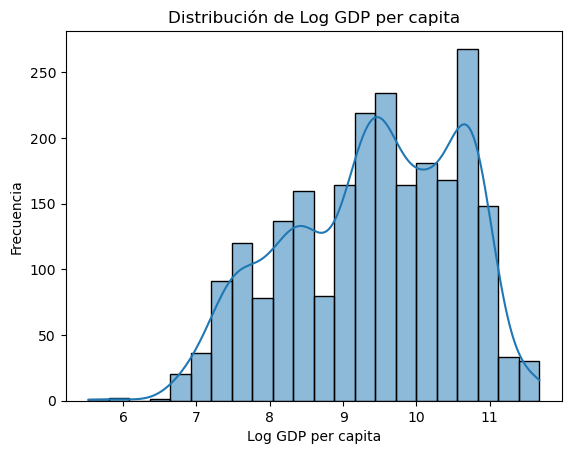

In [15]:
# Crear el histograma de la columna "Gdp_Per_Capita".
sns.histplot(df_world_happines['Gdp_Per_Capita'], kde=True)

# Título y etiquetas.
plt.title('Distribución de Log GDP per capita')
plt.xlabel('Log GDP per capita')
plt.ylabel('Frecuencia')
plt.show()

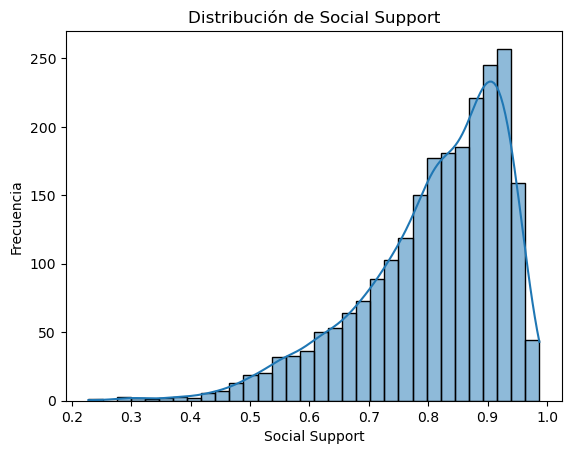

In [16]:
# Crear el histograma de la columna "Social_Support".
sns.histplot(df_world_happines['Social_Support'], kde=True)

# Título y etiquetas.
plt.title('Distribución de Social Support')
plt.xlabel('Social Support')
plt.ylabel('Frecuencia')
plt.show()

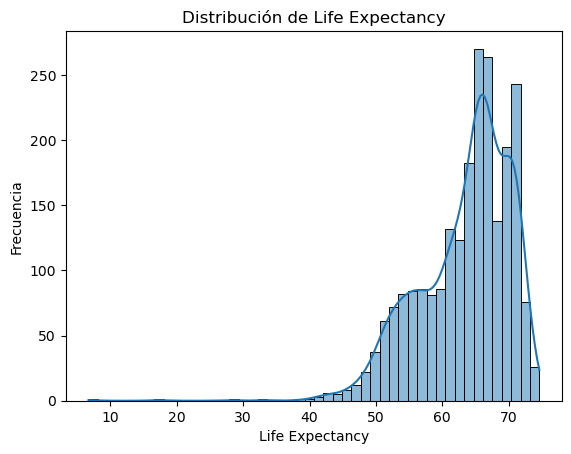

In [17]:
# Crear el histograma de la columna "Life_Expectancy".
sns.histplot(df_world_happines['Life_Expectancy'], kde=True)

# Título y etiquetas.
plt.title('Distribución de Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frecuencia')
plt.show()


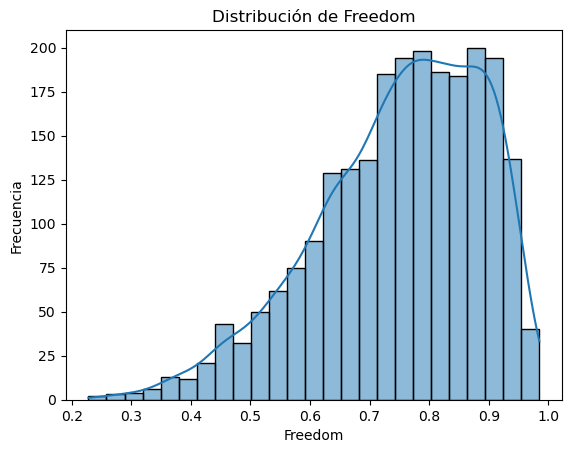

In [18]:
# Crear el histograma de la columna "Freedom".
sns.histplot(df_world_happines['Freedom'], kde=True)

# Título y etiquetas.
plt.title('Distribución de Freedom')
plt.xlabel('Freedom')
plt.ylabel('Frecuencia')
plt.show()


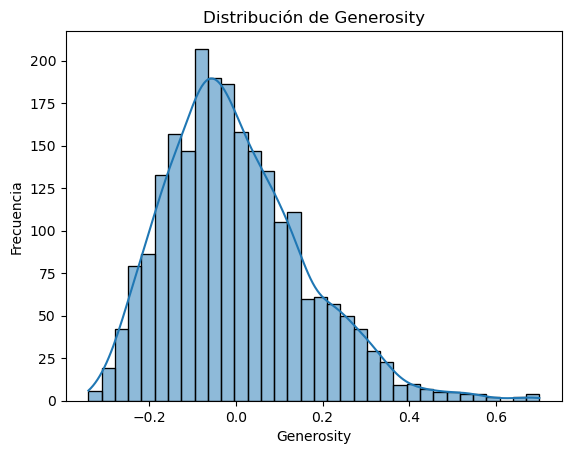

In [19]:
# Crear el histograma de la columna "Generosity"
sns.histplot(df_world_happines['Generosity'], kde=True)

# Título y etiquetas.
plt.title('Distribución de Generosity')
plt.xlabel('Generosity')
plt.ylabel('Frecuencia')
plt.show()


In [20]:
from scipy.stats import skew

# Calcular la asimetría de Generosity
skewness = skew(df_world_happines['Generosity'].dropna())
print(f"Asimetría de Generosity: {skewness}")


Asimetría de Generosity: 0.7688748051456146


No es simetrica, presenta una asimetría positiva (Esto lo he hecho porque era la que mas se parecia a la camapana, pero no es simétrica)

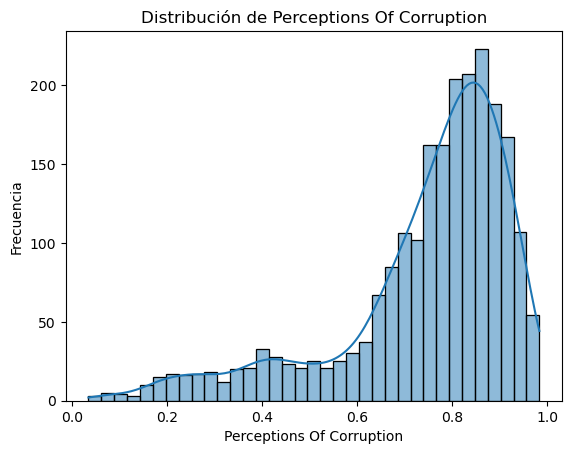

In [21]:
# Crear el histograma de la columna "Perceptions_Of_Corruption"
sns.histplot(df_world_happines['Perceptions_Of_Corruption'], kde=True)

# Título y etiquetas.
plt.title('Distribución de Perceptions Of Corruption')
plt.xlabel('Perceptions Of Corruption')
plt.ylabel('Frecuencia')
plt.show()


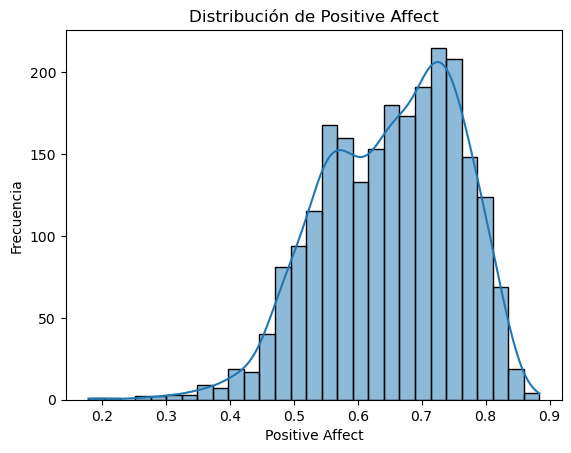

In [22]:
# Crear el histograma de la columna "Positive_Affect"
sns.histplot(df_world_happines['Positive_Affect'], kde=True)

# Título y etiquetas.
plt.title('Distribución de Positive Affect')
plt.xlabel('Positive Affect')
plt.ylabel('Frecuencia')
plt.show()


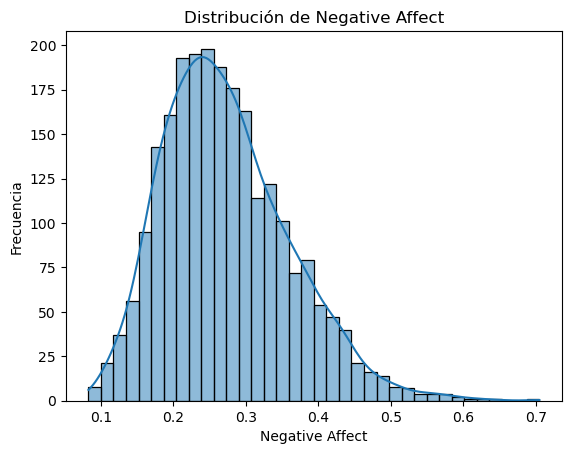

In [23]:
# Crear el histograma de la columna "Negative_Affect"
sns.histplot(df_world_happines['Negative_Affect'], kde=True)

# Título y etiquetas.
plt.title('Distribución de Negative Affect')
plt.xlabel('Negative Affect')
plt.ylabel('Frecuencia')
plt.show()


In [24]:
# Identificar columnas con valores nulos
columnas_con_nulos = df_world_happines.columns[df_world_happines.isnull().any()]

# Imputar solo las columnas con valores nulos con su mediana
for columna in columnas_con_nulos:
    df_world_happines[columna].fillna(df_world_happines[columna].median(), inplace=True)

# Verificar si aún quedan valores nulos
print(df_world_happines.isnull().sum())



Country                      0
Year                         0
Happiness_Score              0
Gdp_Per_Capita               0
Social_Support               0
Life_Expectancy              0
Freedom                      0
Generosity                   0
Perceptions_Of_Corruption    0
Positive_Affect              0
Negative_Affect              0
dtype: int64


In [25]:
df_world_happines.describe().T 

,count,mean,std,min,25%,50%,75%,max
Year,2363.0,2014.763860,5.059436,2005.000,2011.000,2015.0000,2019.0000,2023.000
Happiness_Score,2363.0,5.483566,1.125522,1.281,4.647,5.4490,6.3235,8.019
Gdp_Per_Capita,2363.0,9.400895,1.145275,5.527,8.520,9.5030,10.3820,11.676
Social_Support,2363.0,0.809508,0.120892,0.228,0.744,0.8345,0.9040,0.987
Life_Expectancy,2363.0,63.447103,6.756316,6.720,59.545,65.1000,68.4000,74.600
Freedom,2363.0,0.750598,0.138314,0.228,0.662,0.7710,0.8610,0.985
Generosity,2363.0,-0.000660,0.158647,-0.340,-0.108,-0.0220,0.0880,0.700
Perceptions_Of_Corruption,2363.0,0.746855,0.180321,0.035,0.696,0.7985,0.8640,0.983
Positive_Affect,2363.0,0.651995,0.105704,0.179,0.573,0.6630,0.7365,0.884
Negative_Affect,2363.0,0.273075,0.086840,0.083,0.209,0.2620,0.3260,0.705


In [26]:
df_world_happines.to_csv('df_world_happiness.csv', index=False)